# Effect of Robot Milking on quality of Milk of farms


Some farms have a milking robot but they are not sure that this improve quality because the cows are less controlled so maybe there will be more somatic cells and spores.


### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # mount google drive to /content directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
# path to datasets

info_farm = "/content/drive/MyDrive/Polimi third semester/Data Analytics for Smart Agriculture/Real Project Analysis/Effect of milking robot on quality of milk/info_farm.xlsx"
latteria_old = "/content/drive/MyDrive/Polimi third semester/Data Analytics for Smart Agriculture/Real Project Analysis/Effect of milking robot on quality of milk/latteria.xlsx"
latteria_new = "/content/drive/MyDrive/Polimi third semester/Data Analytics for Smart Agriculture/Real Project Analysis/Effect of milking robot on quality of milk/file analisi.XLSX"


First of all, we have to concatenate the data of in the old and new latteria dataset.

In [ ]:
farm_info_dataset = pd.read_excel(info_farm)
old_latteria_dataset = pd.read_excel(latteria_old)
new_latteria_dataset = pd.read_excel(latteria_new)

In [ ]:
new_latteria_dataset.head()

,azienda agricola,data analisi,grasso,proteine,cellule somatiche x1000,carica batterica x1000,spore,crioscopia,lattosio,urea,caseine,media geometrica cellule somatiche x 1000,media geometrica carica batterica x 1000
0,CR 81 TAVASCI GIUSTINO,2020-10-06,3.87,3.57,111,4,1,-0.527,5.04,24.3,2.81,101,6
1,CR 81 TAVASCI GIUSTINO,2020-10-21,3.98,3.70,96,4,1,-0.528,5.10,24.1,2.91,99,5
2,CR 81 TAVASCI GIUSTINO,2020-10-28,3.86,3.56,114,10,1,-0.525,5.11,17.0,2.81,102,6
3,CR 81 TAVASCI GIUSTINO,2020-11-04,4.01,3.59,120,7,1,-0.526,5.12,27.5,2.85,106,6
4,CR 81 TAVASCI GIUSTINO,2020-11-25,3.97,3.57,105,5,1,-0.524,5.07,22.6,2.84,105,5


In [ ]:
old_latteria_dataset.head()

,farm,date,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000
0,AZ. AGR. FORTINI CRISTIAN,2021-01-07,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4
1,AZ. AGR. FORTINI CRISTIAN,2021-01-14,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5
2,AZ. AGR. FORTINI CRISTIAN,2021-01-21,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6
3,AZ. AGR. FORTINI CRISTIAN,2021-02-04,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6
4,AZ. AGR. FORTINI CRISTIAN,2021-02-18,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6


In [ ]:
unique_farms_new_dataset = new_latteria_dataset['azienda agricola'].unique()
print(len(unique_farms_new_dataset))

unique_farms_old_dataset = old_latteria_dataset['farm'].unique()
print(len(unique_farms_old_dataset))

45
102


Rename coloumn names to be same as each other and then concatenate the data of two files.

In [ ]:
# Rename columns of df2 to match columns of df1
new_latteria_dataset.rename(columns=dict(zip(new_latteria_dataset.columns, old_latteria_dataset.columns)), inplace=True)

# Concatenate DataFrames
latteria_dataset = pd.concat([old_latteria_dataset, new_latteria_dataset], ignore_index=True)


In [ ]:
print(len(new_latteria_dataset))
print(len(old_latteria_dataset))
print(len(latteria_dataset))

4289
7066
11355


In [ ]:
latteria_dataset

,farm,date,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000
0,AZ. AGR. FORTINI CRISTIAN,2021-01-07,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4
1,AZ. AGR. FORTINI CRISTIAN,2021-01-14,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5
2,AZ. AGR. FORTINI CRISTIAN,2021-01-21,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6
3,AZ. AGR. FORTINI CRISTIAN,2021-02-04,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6
4,AZ. AGR. FORTINI CRISTIAN,2021-02-18,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11350,SOCIETA AGRICOLA ZAMBONI S.S.,2023-09-19,4.40,3.85,265,6,1,-0.528,4.92,28.4,3.00,267,3
11351,SOCIETA AGRICOLA ZAMBONI S.S.,2023-09-26,4.53,3.88,361,7,965,-0.528,4.92,27.1,3.04,271,3
11352,SOCIETA AGRICOLA ZAMBONI S.S.,2023-10-10,4.33,3.87,229,3,1,-0.529,4.88,24.8,3.04,263,4
11353,SOCIETA AGRICOLA ZAMBONI S.S.,2023-10-17,4.70,3.93,299,4,360,-0.529,4.89,22.7,3.08,267,4


In [ ]:
# remove the first 2 empty coloumns of info dataset
farm_info_dataset = farm_info_dataset.drop(farm_info_dataset.columns[:2], axis=1)
farm_info_dataset = farm_info_dataset.drop(farm_info_dataset.columns[0], axis=1)

farm_info_dataset

,robot mungitura,< 45 anni,testo
0,N,N,BODENGO
1,N,N,FALLINI DANIELE E FABIO
2,N,N,DEGHI ALBERTO
3,N,N,FALLINI MICHELE
4,N,N,PIZZINI GAETANO
...,...,...,...
82,N,N,POZZI ROSINA
83,N,N,RIZZI UMBERTO
84,N,N,SPANDRIO CONCETTA
85,N,N,PINI ALBERTO


We have to set identical names for farms in latteria dataset to farm_info testo cololumn.

In [ ]:
for farm_name in farm_info_dataset['testo']:
  # Check if 'fortini' is present in the "farm" column and update the values
  latteria_dataset['farm'] = latteria_dataset['farm'].apply(lambda x: farm_name if farm_name in x else x)

In [ ]:
latteria_dataset

,farm,date,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000
0,FORTINI,2021-01-07,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4
1,FORTINI,2021-01-14,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5
2,FORTINI,2021-01-21,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6
3,FORTINI,2021-02-04,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6
4,FORTINI,2021-02-18,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11350,ZAMBONI,2023-09-19,4.40,3.85,265,6,1,-0.528,4.92,28.4,3.00,267,3
11351,ZAMBONI,2023-09-26,4.53,3.88,361,7,965,-0.528,4.92,27.1,3.04,271,3
11352,ZAMBONI,2023-10-10,4.33,3.87,229,3,1,-0.529,4.88,24.8,3.04,263,4
11353,ZAMBONI,2023-10-17,4.70,3.93,299,4,360,-0.529,4.89,22.7,3.08,267,4


In [ ]:
# # correct the scale of somatic cell and bacterial
# latteria_dataset['somatic cells x1000'] = latteria_dataset['somatic cells x1000'] * 1000
# latteria_dataset['bacterial load x1000'] = latteria_dataset['bacterial load x1000'] * 1000

## Extract the dataset

In [ ]:
latteria_dataset.to_csv('a.csv', index=False)

In [ ]:
# check if the unique of these are the same
print(len(latteria_dataset['farm'].unique()))

print(len(farm_info_dataset['testo'].unique()))

99
87


Since we are going to analyze the effect of robot milking, we should keep only the farms which we have the data about whether they have robot milking or not.

In [ ]:
# check if unique of final material dataset is the same as infor farm names

final_latteria_dataset = latteria_dataset[latteria_dataset['farm'].isin(farm_info_dataset['testo'])]

In [ ]:
# check if the unique of these are the same
print(len(final_latteria_dataset['farm'].unique()))

print(len(farm_info_dataset['testo'].unique()))

86
87


We dont have any data for the farm "FALLINI DANIELE E FABIO".

So we remove the row from info-dataset as well before combining the two datasets.

In [ ]:
farm_info_dataset = farm_info_dataset[farm_info_dataset['testo'].isin(final_latteria_dataset['farm'])]

In [ ]:
# check if the unique of these are the same
print(len(final_latteria_dataset['farm'].unique()))

print(len(farm_info_dataset['testo'].unique()))

86
86


Now, we have to combine these two datasets and try to add the two coloumns robot mungitura and anni to it.

In [ ]:
farm_info_dataset

,robot mungitura,< 45 anni,testo
0,N,N,BODENGO
2,N,N,DEGHI ALBERTO
3,N,N,FALLINI MICHELE
4,N,N,PIZZINI GAETANO
5,S,N,FARM DI CODEGA MICHELE E FIGLI
...,...,...,...
82,N,N,POZZI ROSINA
83,N,N,RIZZI UMBERTO
84,N,N,SPANDRIO CONCETTA
85,N,N,PINI ALBERTO


In [ ]:
final_latteria_dataset

,farm,date,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000
0,FORTINI,2021-01-07,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4
1,FORTINI,2021-01-14,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5
2,FORTINI,2021-01-21,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6
3,FORTINI,2021-02-04,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6
4,FORTINI,2021-02-18,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11350,ZAMBONI,2023-09-19,4.40,3.85,265,6,1,-0.528,4.92,28.4,3.00,267,3
11351,ZAMBONI,2023-09-26,4.53,3.88,361,7,965,-0.528,4.92,27.1,3.04,271,3
11352,ZAMBONI,2023-10-10,4.33,3.87,229,3,1,-0.529,4.88,24.8,3.04,263,4
11353,ZAMBONI,2023-10-17,4.70,3.93,299,4,360,-0.529,4.89,22.7,3.08,267,4


## Dataset

In [ ]:
# change the name of coloumn 'testo' to 'farm'
farm_info_dataset = farm_info_dataset.rename(columns={'testo': 'farm'})

# Merge two data frames based on 'farm'
merged_latteria_dataset = pd.merge(final_latteria_dataset, farm_info_dataset, on='farm')

print(merged_latteria_dataset.shape)
merged_latteria_dataset

(10730, 15)


,farm,date,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000,robot mungitura,< 45 anni
0,FORTINI,2021-01-07,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4,N,S
1,FORTINI,2021-01-14,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5,N,S
2,FORTINI,2021-01-21,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6,N,S
3,FORTINI,2021-02-04,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6,N,S
4,FORTINI,2021-02-18,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,TREEFFE SOCIETA' AGRICOLA,2023-09-20,4.06,3.70,347,9,1,-0.525,4.74,18.6,2.93,197,15,N,N
10726,TREEFFE SOCIETA' AGRICOLA,2023-09-27,4.31,3.85,284,9,1,-0.526,4.75,23.5,3.04,216,13,N,N
10727,TREEFFE SOCIETA' AGRICOLA,2023-10-11,4.40,3.97,206,6,360,-0.524,4.74,26.6,3.13,214,11,N,N
10728,TREEFFE SOCIETA' AGRICOLA,2023-10-18,4.33,3.95,229,7,965,-0.521,4.74,20.2,3.13,217,10,N,N


In [ ]:
merged_latteria_dataset['robot mungitura'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
final_latteria_dataset['farm'].unique()

## Task1-1: Effect of robot in quality

Now that we have the required datset for our task, we have to check the correlation between the use of robot mungitura and teh quality of milk.

To do so, we must first find the quality milk.

We have to make an average for each month and analyze the task for each month.

In [ ]:
merged_latteria_dataset['year']  = merged_latteria_dataset['date'].dt.year
merged_latteria_dataset['month'] = merged_latteria_dataset['date'].dt.month
merged_latteria_dataset['day']   = merged_latteria_dataset['date'].dt.day

merged_latteria_dataset = merged_latteria_dataset.drop(['date'], axis = 1)

merged_latteria_dataset

,farm,fat,protein,somatic cells x1000,bacterial load x1000,spores,cryoscopy,lactose,urea,caseins,geometric mean somatic cells x1000,geometric average bacterial load x1000,robot mungitura,< 45 anni,year,month,day
0,FORTINI,4.36,3.73,82,3,1,-0.523,5.04,22.6,2.93,154,4,N,S,2021,1,7
1,FORTINI,4.42,3.72,81,10,3000,-0.522,5.03,22.2,2.92,143,5,N,S,2021,1,14
2,FORTINI,4.37,3.70,540,12,300,-0.526,5.00,20.1,2.89,163,6,N,S,2021,1,21
3,FORTINI,4.31,3.49,72,5,1,-0.526,5.04,18.5,2.73,157,6,N,S,2021,2,4
4,FORTINI,4.36,3.47,73,4,1,-0.523,5.00,14.6,2.73,146,6,N,S,2021,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,TREEFFE SOCIETA' AGRICOLA,4.06,3.70,347,9,1,-0.525,4.74,18.6,2.93,197,15,N,N,2023,9,20
10726,TREEFFE SOCIETA' AGRICOLA,4.31,3.85,284,9,1,-0.526,4.75,23.5,3.04,216,13,N,N,2023,9,27
10727,TREEFFE SOCIETA' AGRICOLA,4.40,3.97,206,6,360,-0.524,4.74,26.6,3.13,214,11,N,N,2023,10,11
10728,TREEFFE SOCIETA' AGRICOLA,4.33,3.95,229,7,965,-0.521,4.74,20.2,3.13,217,10,N,N,2023,10,18


In [ ]:
# columns_to_analyze = [
#     'fat',
#     'caseins',
#     'bacterial load x1000',
#     'somatic cells x1000',
#     'spores']

In [ ]:
df = merged_latteria_dataset.copy()

# Convert 'year' and 'month' columns to datetime format
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Specify the features for which you want to calculate the mean
selected_features = ['fat', 'caseins', 'bacterial load x1000', 'somatic cells x1000', 'spores']

# Group by 'farm', 'year', and 'month', and calculate the mean for each feature
monthly_means = df.groupby(['farm', 'robot mungitura',	'< 45 anni', 'year', 'month'])[selected_features].mean().reset_index()

# Print the result
monthly_means

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores
0,AZIENDA AGRICOLA PASSERINI,N,S,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333
1,AZIENDA AGRICOLA PASSERINI,N,S,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667
2,AZIENDA AGRICOLA PASSERINI,N,S,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000
3,AZIENDA AGRICOLA PASSERINI,N,S,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667
4,AZIENDA AGRICOLA PASSERINI,N,S,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333
...,...,...,...,...,...,...,...,...,...,...
2530,ZAMBONI,N,S,2023,6,4.236667,3.023333,3.333333,296.666667,1383.666667
2531,ZAMBONI,N,S,2023,7,3.980000,3.023333,3.333333,309.666667,322.333333
2532,ZAMBONI,N,S,2023,8,4.323333,2.993333,2.666667,233.333333,1.000000
2533,ZAMBONI,N,S,2023,9,4.286667,3.013333,5.000000,285.666667,322.333333


In [ ]:
print("Num of Si: " , len(monthly_means[monthly_means['robot mungitura'] == 'S']))
print("Num of No: " , len(monthly_means[monthly_means['robot mungitura'] == 'N']))

Num of Si:  321
Num of No:  2214


## Task0-1: Effect of using robot in somantic cells

In [ ]:
## seasonly analisis

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring',
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

copy_monthly_means = monthly_means.copy()

# Use the map function to replace string values with integers
copy_monthly_means['season'] = copy_monthly_means['month'].apply(lambda x: season_dict[x])

copy_monthly_means.head()

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality,season
0,AZIENDA AGRICOLA PASSERINI,0,1,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4,Winter
1,AZIENDA AGRICOLA PASSERINI,0,1,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1,Winter
2,AZIENDA AGRICOLA PASSERINI,0,1,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2,Spring
3,AZIENDA AGRICOLA PASSERINI,0,1,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1,Spring
4,AZIENDA AGRICOLA PASSERINI,0,1,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4,Spring


In [ ]:
df_gp0 = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()

df_gp0

<ipython-input-77-f9413d59dcff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp0 = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()


,robot mungitura,season,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,Fall,0.304598,2021.674330,9.852490,4.227040,2.873212,27.488802,235.699257,990.969166,2.122605
1,0,Spring,0.293578,2022.006116,4.000000,4.155441,2.806992,26.017762,196.261137,460.245693,3.472477
2,0,Summer,0.303571,2021.988095,6.851190,4.046446,2.758639,25.032738,247.904167,742.218585,2.585317
3,0,Winter,0.294007,2021.812734,3.507491,4.307147,2.876710,16.915106,199.602840,637.041823,2.863296
4,1,Fall,0.395062,2021.493827,9.950617,4.108272,2.890535,42.485597,253.299383,1662.104938,0.222222
5,1,Spring,0.419355,2021.967742,4.000000,4.065179,2.808297,28.713262,225.204301,994.557348,2.096774
6,1,Summer,0.369231,2021.938462,6.784615,3.895379,2.740415,22.130256,279.821026,1780.577949,0.800000
7,1,Winter,0.402439,2021.707317,4.060976,4.229350,2.902378,19.126016,219.878049,989.621951,1.695122


<BarContainer object of 8 artists>

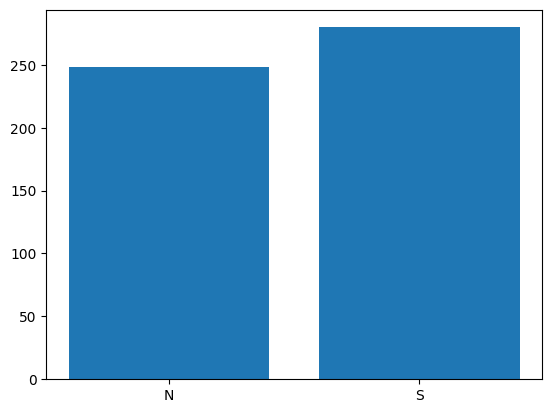

In [ ]:
plt.bar(df_gp0['robot mungitura'].map({0: 'N', 1: 'S'}), df_gp0['somatic cells x1000'])

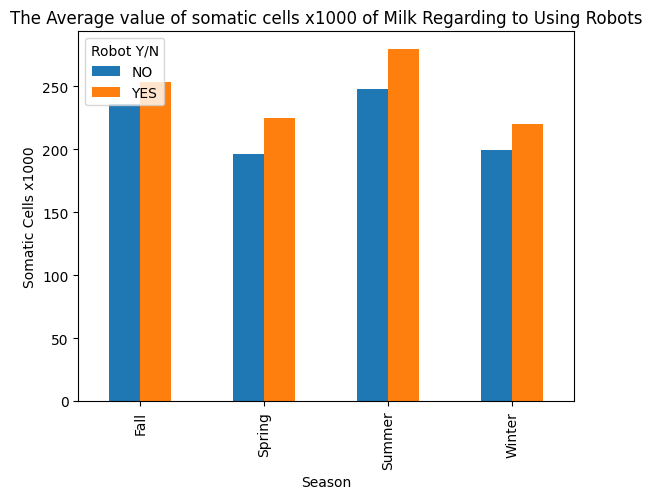

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_gp0['robot mungitura'] = df_gp0['robot mungitura'].map({0: 'NO', 1: 'YES'})

_ = df_gp0.pivot(index = 'season', columns = 'robot mungitura', values = 'somatic cells x1000').plot(
    kind = 'bar'
)

plt.title(f'The Average value of somatic cells x1000 of Milk Regarding to Using Robots')
plt.xlabel('Season')
plt.ylabel('Somatic Cells x1000')
plt.legend(title = 'Robot Y/N', loc = 'upper left')
plt.show()

## Task0-2: Effect of using robot in spores

In [ ]:
## seasonly analisis

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring',
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

copy_monthly_means = monthly_means.copy()

# Use the map function to replace string values with integers
copy_monthly_means['season'] = copy_monthly_means['month'].apply(lambda x: season_dict[x])

copy_monthly_means.head()

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality,season
0,AZIENDA AGRICOLA PASSERINI,0,1,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4,Winter
1,AZIENDA AGRICOLA PASSERINI,0,1,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1,Winter
2,AZIENDA AGRICOLA PASSERINI,0,1,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2,Spring
3,AZIENDA AGRICOLA PASSERINI,0,1,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1,Spring
4,AZIENDA AGRICOLA PASSERINI,0,1,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4,Spring


In [ ]:
df_gp01 = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()

df_gp01

<ipython-input-81-5dbefb2716b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp01 = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()


,robot mungitura,season,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,Fall,0.304598,2021.674330,9.852490,4.227040,2.873212,27.488802,235.699257,990.969166,2.122605
1,0,Spring,0.293578,2022.006116,4.000000,4.155441,2.806992,26.017762,196.261137,460.245693,3.472477
2,0,Summer,0.303571,2021.988095,6.851190,4.046446,2.758639,25.032738,247.904167,742.218585,2.585317
3,0,Winter,0.294007,2021.812734,3.507491,4.307147,2.876710,16.915106,199.602840,637.041823,2.863296
4,1,Fall,0.395062,2021.493827,9.950617,4.108272,2.890535,42.485597,253.299383,1662.104938,0.222222
5,1,Spring,0.419355,2021.967742,4.000000,4.065179,2.808297,28.713262,225.204301,994.557348,2.096774
6,1,Summer,0.369231,2021.938462,6.784615,3.895379,2.740415,22.130256,279.821026,1780.577949,0.800000
7,1,Winter,0.402439,2021.707317,4.060976,4.229350,2.902378,19.126016,219.878049,989.621951,1.695122


<BarContainer object of 8 artists>

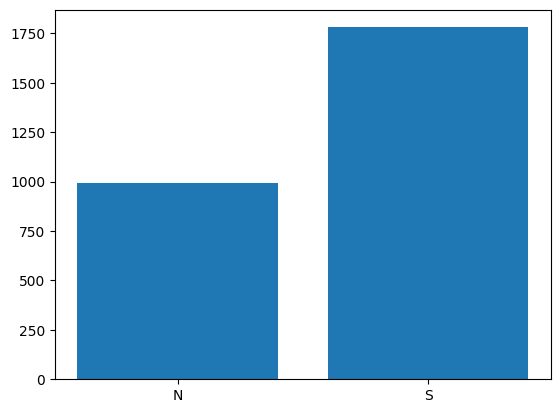

In [ ]:
plt.bar(df_gp01['robot mungitura'].map({0: 'N', 1: 'S'}), df_gp01['spores'])

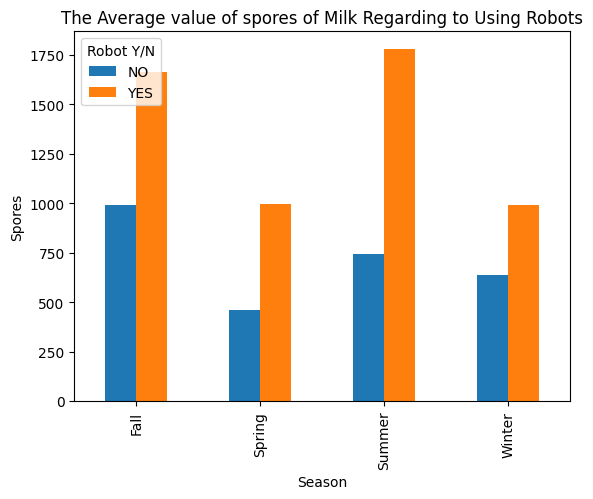

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_gp01['robot mungitura'] = df_gp01['robot mungitura'].map({0: 'NO', 1: 'YES'})

_ = df_gp01.pivot(index = 'season', columns = 'robot mungitura', values = 'spores').plot(
    kind = 'bar'
)

plt.title(f'The Average value of spores of Milk Regarding to Using Robots')
plt.xlabel('Season')
plt.ylabel('Spores')
plt.legend(title = 'Robot Y/N', loc = 'upper left')
plt.show()

## Define Quality Calculator function

Then we will add the quality coloumn to the monthly-means to analyze the relation of using robots and quality.

In [ ]:
# definition of quality function
# It calcuklates the quality based on each feature value.

def quality_calculator(row):

  score = 0
  fat = row['fat']
  caseins = row['caseins']
  bact = row['bacterial load x1000']
  somatic = row['somatic cells x1000']
  spores = row['spores']

  if (fat < 3,8):
    score -= 1
  elif (fat > 3,8):
    if (fat > 4,6):
      score +=1
    score += 1

  if(caseins < 2,65):
      score -= 1
  elif (caseins > 2,65):
      score += 1

  if(bact < 24999):
      score += 1
  elif (bact > 50000 and bact < 74999):
      score -= 1
  elif (bact > 75000 and bact < 99999):
      score -= 2
  elif (bact > 100000):
      score -= 3

  if(somatic <= 200000):
      score += 1
      if(somatic <= 150000):
        score += 1
        if(somatic <= 100000):
          score += 1
  elif (somatic >= 300000):
      score -= 1
      if(somatic >= 350000):
        score -= 1
        if(somatic >= 400000):
          score -= 1

  if (spores < 351):
    score += 1
    if(spores < 251):
      score += 1
      if(spores < 151):
        score += 1
        if(spores < 76):
          score += 1
  elif (spores > 500):
    score -= 1
    if(spores > 700):
      score -= 1
      if(spores > 1000):
        score -= 1
        if(spores > 1500):
          score -= 1
          if(spores > 2000):
            score -= 1
            if(spores > 3000):
              score -= 1

  return score

In [ ]:
# Apply the function to each row and create a new column 'quality'

monthly_means['quality'] = monthly_means.apply(quality_calculator, axis=1)

monthly_means

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,AZIENDA AGRICOLA PASSERINI,N,S,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4
1,AZIENDA AGRICOLA PASSERINI,N,S,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1
2,AZIENDA AGRICOLA PASSERINI,N,S,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2
3,AZIENDA AGRICOLA PASSERINI,N,S,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1
4,AZIENDA AGRICOLA PASSERINI,N,S,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4
...,...,...,...,...,...,...,...,...,...,...,...
2530,ZAMBONI,N,S,2023,6,4.236667,3.023333,3.333333,296.666667,1383.666667,-1
2531,ZAMBONI,N,S,2023,7,3.980000,3.023333,3.333333,309.666667,322.333333,3
2532,ZAMBONI,N,S,2023,8,4.323333,2.993333,2.666667,233.333333,1.000000,6
2533,ZAMBONI,N,S,2023,9,4.286667,3.013333,5.000000,285.666667,322.333333,3


In [ ]:
print("Quality Min: ", monthly_means['quality'].min())
print("Quality Max: ", monthly_means['quality'].max())

Quality Min:  -4
Quality Max:  6


In [ ]:
# Check if 'Column2' has NaN values
if monthly_means['quality'].isnull().any():
    print("Column 'quality' has NaN values.")
else:
    print("Column 'quality' does not have NaN values.")

Column 'quality' does not have NaN values.


We have to change the columns age of farmer and robot mungitura to cathegorical values.

In [ ]:
# Define a mapping from string to integer
mapping = {'S': 1, 'N': 0}

# Use the map function to replace string values with integers
monthly_means['robot mungitura'] = monthly_means['robot mungitura'].map(mapping)
monthly_means['< 45 anni'] = monthly_means['< 45 anni'].map(mapping)
monthly_means

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,AZIENDA AGRICOLA PASSERINI,0,1,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4
1,AZIENDA AGRICOLA PASSERINI,0,1,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1
2,AZIENDA AGRICOLA PASSERINI,0,1,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2
3,AZIENDA AGRICOLA PASSERINI,0,1,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1
4,AZIENDA AGRICOLA PASSERINI,0,1,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4
...,...,...,...,...,...,...,...,...,...,...,...
2530,ZAMBONI,0,1,2023,6,4.236667,3.023333,3.333333,296.666667,1383.666667,-1
2531,ZAMBONI,0,1,2023,7,3.980000,3.023333,3.333333,309.666667,322.333333,3
2532,ZAMBONI,0,1,2023,8,4.323333,2.993333,2.666667,233.333333,1.000000,6
2533,ZAMBONI,0,1,2023,9,4.286667,3.013333,5.000000,285.666667,322.333333,3


In [ ]:
print(monthly_means['robot mungitura'].unique())

print(monthly_means['< 45 anni'].unique())

[0 1]
[1 0]


Now, we want to implement the task to find the relation of robot and age of farmer with quality.

In [ ]:
df_gp = monthly_means.groupby('robot mungitura').mean().reset_index()

df_gp

<ipython-input-35-69e8838c3b00>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp = monthly_means.groupby('robot mungitura').mean().reset_index()


,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,0.298555,2021.877145,5.910117,4.184101,2.828413,23.944868,218.121686,692.206454,2.805330
1,1,0.398754,2021.775701,6.080997,4.083607,2.839336,28.406438,241.992575,1320.906231,1.258567


<BarContainer object of 2 artists>

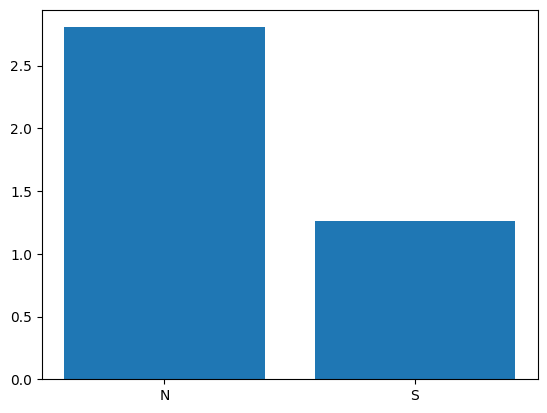

In [ ]:
plt.bar(df_gp['robot mungitura'].map({0: 'N', 1: 'S'}), df_gp['quality'])

In [ ]:
## seasonly analisis

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring',
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

copy_monthly_means = monthly_means.copy()

# Use the map function to replace string values with integers
copy_monthly_means['season'] = copy_monthly_means['month'].apply(lambda x: season_dict[x])

copy_monthly_means.head()

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality,season
0,AZIENDA AGRICOLA PASSERINI,0,1,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4,Winter
1,AZIENDA AGRICOLA PASSERINI,0,1,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1,Winter
2,AZIENDA AGRICOLA PASSERINI,0,1,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2,Spring
3,AZIENDA AGRICOLA PASSERINI,0,1,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1,Spring
4,AZIENDA AGRICOLA PASSERINI,0,1,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4,Spring


In [ ]:
df_gp = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()

df_gp

<ipython-input-38-ed8edfd468d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp = copy_monthly_means.groupby(['robot mungitura', 'season']).mean().reset_index()


,robot mungitura,season,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,Fall,0.304598,2021.674330,9.852490,4.227040,2.873212,27.488802,235.699257,990.969166,2.122605
1,0,Spring,0.293578,2022.006116,4.000000,4.155441,2.806992,26.017762,196.261137,460.245693,3.472477
2,0,Summer,0.303571,2021.988095,6.851190,4.046446,2.758639,25.032738,247.904167,742.218585,2.585317
3,0,Winter,0.294007,2021.812734,3.507491,4.307147,2.876710,16.915106,199.602840,637.041823,2.863296
4,1,Fall,0.395062,2021.493827,9.950617,4.108272,2.890535,42.485597,253.299383,1662.104938,0.222222
5,1,Spring,0.419355,2021.967742,4.000000,4.065179,2.808297,28.713262,225.204301,994.557348,2.096774
6,1,Summer,0.369231,2021.938462,6.784615,3.895379,2.740415,22.130256,279.821026,1780.577949,0.800000
7,1,Winter,0.402439,2021.707317,4.060976,4.229350,2.902378,19.126016,219.878049,989.621951,1.695122


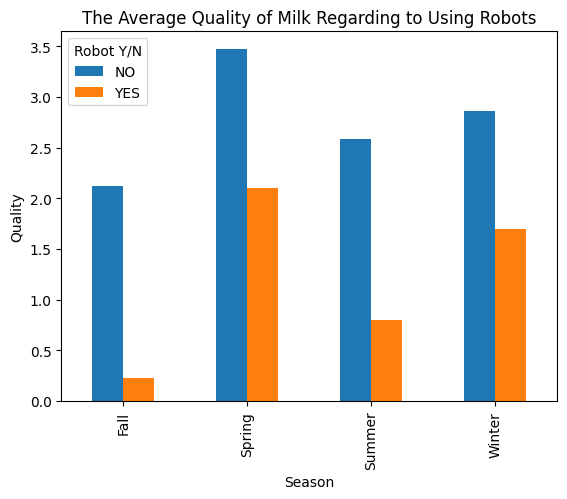

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_gp['robot mungitura'] = df_gp['robot mungitura'].map({0: 'NO', 1: 'YES'})

_ = df_gp.pivot(index = 'season', columns = 'robot mungitura', values = 'quality').plot(
    kind = 'bar'
)

plt.title(f'The Average Quality of Milk Regarding to Using Robots')
plt.xlabel('Season')
plt.ylabel('Quality')
plt.legend(title = 'Robot Y/N', loc = 'upper left')
plt.show()

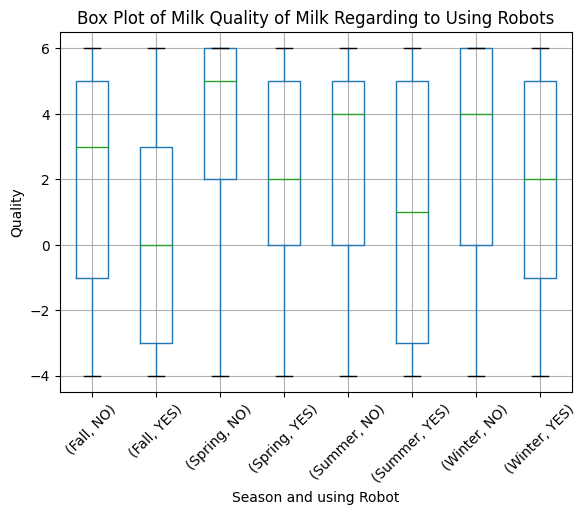

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_gp1 is your DataFrame

copy_monthly_means['robot mungitura'] = monthly_means['robot mungitura'].map({0: 'NO', 1: 'YES'})

# Create a box plot
copy_monthly_means.boxplot(column='quality', by=['season', 'robot mungitura'])

plt.title('Box Plot of Milk Quality of Milk Regarding to Using Robots')
plt.suptitle('')  # Remove the default title from pandas boxplot
plt.xlabel('Season and using Robot')
plt.ylabel('Quality')
plt.xticks(rotation=45)
plt.show()


## Task1-2: Effect of age of farmer in milk quality

In [ ]:
df_gp1 = monthly_means.groupby('< 45 anni').mean().reset_index()

df_gp1

<ipython-input-46-8fc1d9aad52b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp1 = monthly_means.groupby('< 45 anni').mean().reset_index()


,< 45 anni,robot mungitura,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,0.110538,2021.867125,5.924399,4.153523,2.806713,23.742089,214.990051,757.905453,2.517755
1,1,0.162231,2021.858048,5.948035,4.210883,2.880878,26.208766,234.763498,802.602112,2.812421


<BarContainer object of 2 artists>

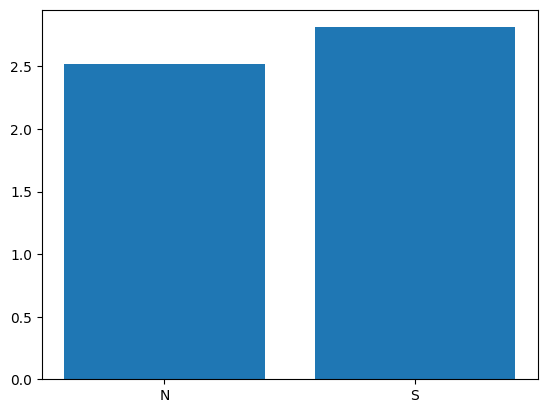

In [ ]:
plt.bar(df_gp1['< 45 anni'].map({0: 'N', 1: 'S'}), df_gp1['quality'])

In [ ]:
## seasonly analisis

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring',
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

copy_monthly_means = monthly_means.copy()

# Use the map function to replace string values with integers
copy_monthly_means['season'] = copy_monthly_means['month'].apply(lambda x: season_dict[x])

copy_monthly_means.head()

,farm,robot mungitura,< 45 anni,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality,season
0,AZIENDA AGRICOLA PASSERINI,0,1,2021,1,4.636667,2.953333,3.666667,116.000000,240.333333,4,Winter
1,AZIENDA AGRICOLA PASSERINI,0,1,2021,2,4.416667,2.913333,2.333333,138.666667,1000.666667,-1,Winter
2,AZIENDA AGRICOLA PASSERINI,0,1,2021,3,4.386667,2.900000,3.666667,177.333333,360.000000,2,Spring
3,AZIENDA AGRICOLA PASSERINI,0,1,2021,4,4.340000,2.973333,3.333333,134.666667,1000.666667,-1,Spring
4,AZIENDA AGRICOLA PASSERINI,0,1,2021,5,4.440000,3.033333,2.666667,112.666667,240.333333,4,Spring


In [ ]:
df_gp1 = copy_monthly_means.groupby(['< 45 anni', 'season']).mean().reset_index()

df_gp1

<ipython-input-59-df9c6bd388ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp1 = copy_monthly_means.groupby(['< 45 anni', 'season']).mean().reset_index()


,< 45 anni,season,robot mungitura,year,month,fat,caseins,bacterial load x1000,somatic cells x1000,spores,quality
0,0,Fall,0.118932,2021.638350,9.871359,4.205170,2.862797,23.966395,229.239309,1041.550537,1.871359
1,0,Spring,0.104651,2022.001938,4.000000,4.129992,2.781414,25.140891,193.317571,520.069961,3.189922
2,0,Summer,0.104592,2022.002551,6.839286,3.999014,2.729583,28.037840,247.335884,822.000850,2.354592
3,0,Winter,0.115023,2021.800469,3.596244,4.274251,2.854090,17.877934,197.696009,712.684664,2.478873
4,1,Fall,0.167539,2021.675393,9.853403,4.223848,2.903024,41.446771,257.097731,1166.479494,1.858639
5,1,Spring,0.168831,2022.000000,4.000000,4.175949,2.864654,29.061688,214.488817,541.724747,3.549784
6,1,Summer,0.135593,2021.937853,6.853107,4.096019,2.816296,17.311488,260.883616,946.844068,2.440678
7,1,Winter,0.173684,2021.794737,3.547368,4.347329,2.938504,15.710526,212.628509,619.608772,3.221053


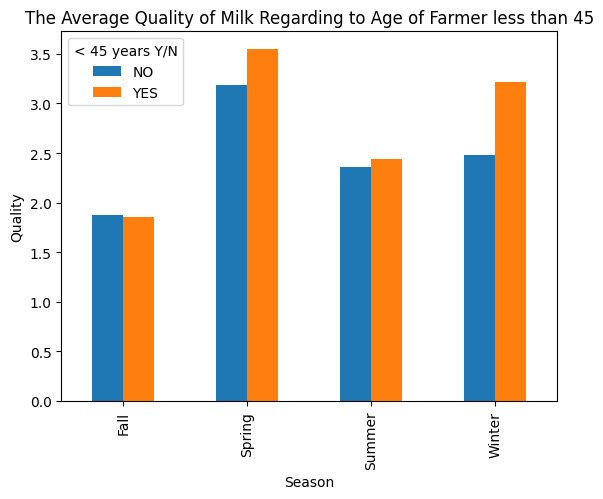

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_gp1['< 45 anni'] = df_gp1['< 45 anni'].map({0: 'NO', 1: 'YES'})

_ = df_gp1.pivot(index = 'season', columns = '< 45 anni', values = 'quality').plot(
    kind = 'bar'
)

plt.title(f'The Average Quality of Milk Regarding to Age of Farmer less than 45')
plt.xlabel('Season')
plt.ylabel('Quality')
plt.legend(title = '< 45 years Y/N', loc = 'upper left')
plt.show()

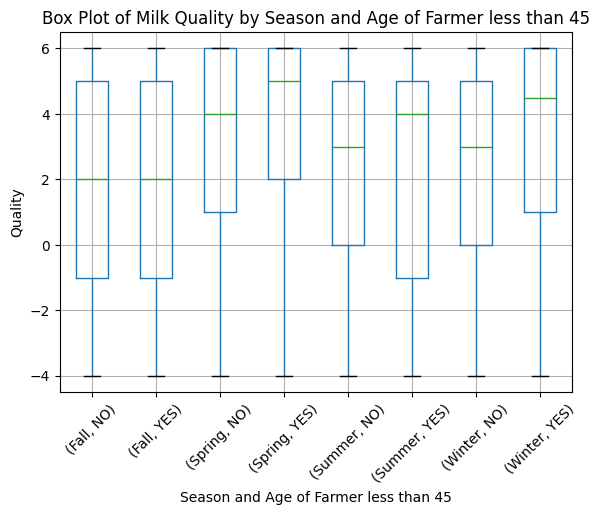

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_gp1 is your DataFrame

copy_monthly_means['< 45 anni'] = monthly_means['< 45 anni'].map({0: 'NO', 1: 'YES'})

# Create a box plot
copy_monthly_means.boxplot(column='quality', by=['season', '< 45 anni'])

plt.title('Box Plot of Milk Quality by Season and Age of Farmer less than 45')
plt.suptitle('')  # Remove the default title from pandas boxplot
plt.xlabel('Season and Age of Farmer less than 45')
plt.ylabel('Quality')
plt.xticks(rotation=45)
plt.show()


## Task 2: Cluster farms based on milk quality (KMeans)

Classify farms based on qulaity of their milk and rank them.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


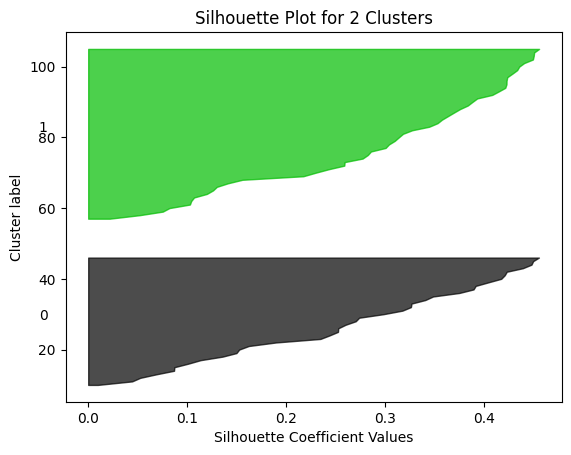

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


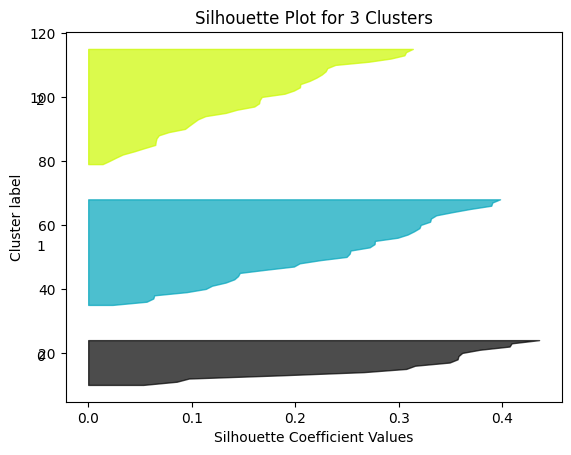

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


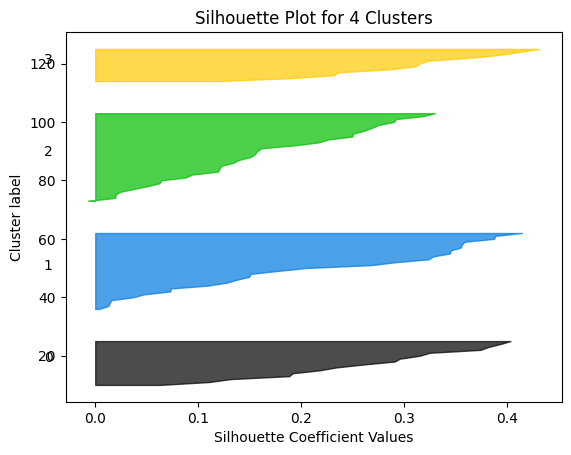

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


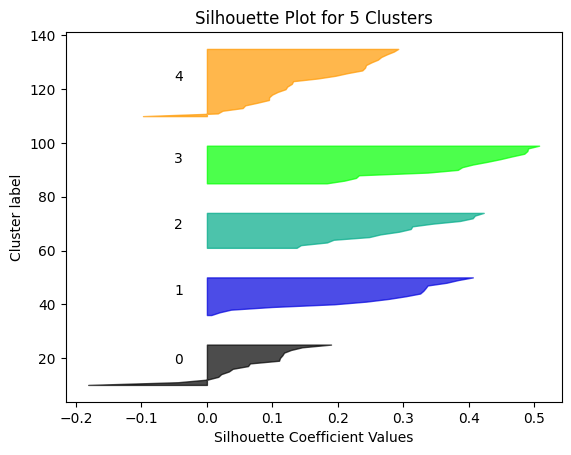

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


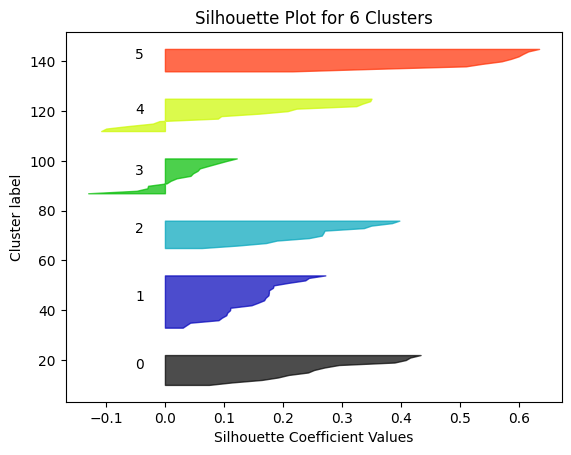

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


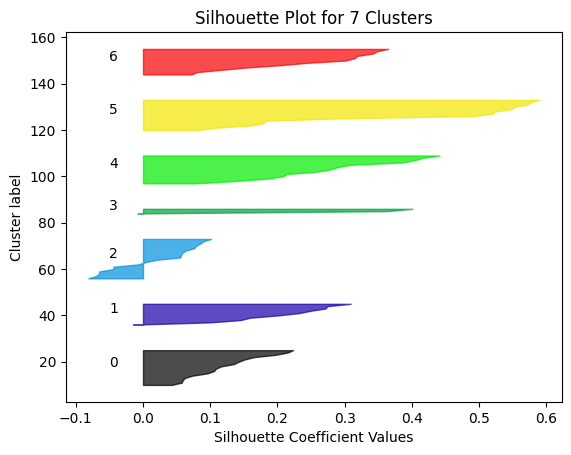

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


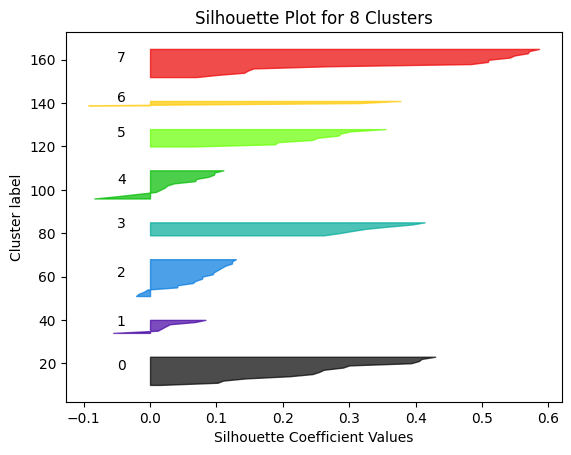

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


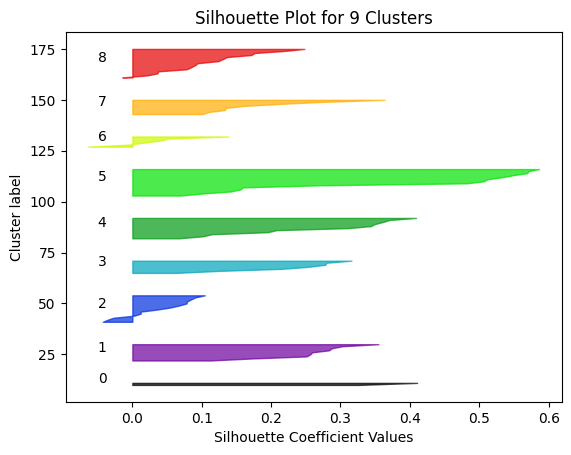

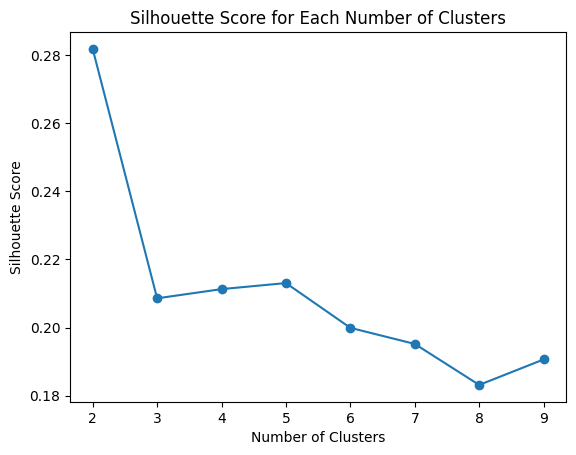

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# inspect the plots and choose the number of clusters that gives the highest average silhouette score. The optimal number of clusters is typically associated with a peak in the silhouette score plot.

# Function to create a silhouette plot
def plot_silhouette(X, clusters_range):
    silhouette_scores = []

    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Silhouette Plot for {n_clusters} Clusters")
        plt.xlabel("Silhouette Coefficient Values")
        plt.ylabel("Cluster label")

        plt.show()

    # Plot Silhouette Scores for different cluster numbers
    plt.plot(clusters_range, silhouette_scores, marker='o')
    plt.title("Silhouette Score for Each Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()


df = monthly_means

# Pivot the DataFrame to have farms as rows and months as columns
pivot_df = df.pivot_table(index='farm', columns='month', values='quality', aggfunc='mean', fill_value=0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

# Convert DataFrame to array for clustering
X = scaled_data

# Define the range of clusters to try
clusters_range = range(2, 10)  # You can adjust this range based on your requirements

# Plot Silhouette plot for different numbers of clusters
plot_silhouette(X, clusters_range)


Now that we found out that the best cluster number is 2, we are going to rank the farms and find the best and worst farms.

In [ ]:
df = monthly_means

# Pivot the DataFrame to have farms as rows and months as columns
pivot_df = df.pivot_table(index='farm', columns='month', values='quality', aggfunc='mean', fill_value=0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster information to the original DataFrame
df['Cluster'] = df['farm'].map(dict(zip(pivot_df.index, clusters)))

ranked_df = df.groupby('farm')['quality'].mean().reset_index()
# Rank farms based on average quality within each cluster
ranked_df = ranked_df.sort_values(by='quality', ascending=False)

# Identify the best and worst farms
best_farm = ranked_df.iloc[0]['farm']
worst_farm = ranked_df.iloc[-1]['farm']

print("Ranked Farms:")
print(ranked_df)
print("\nBest Farm:", best_farm)
print("Worst Farm:", worst_farm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

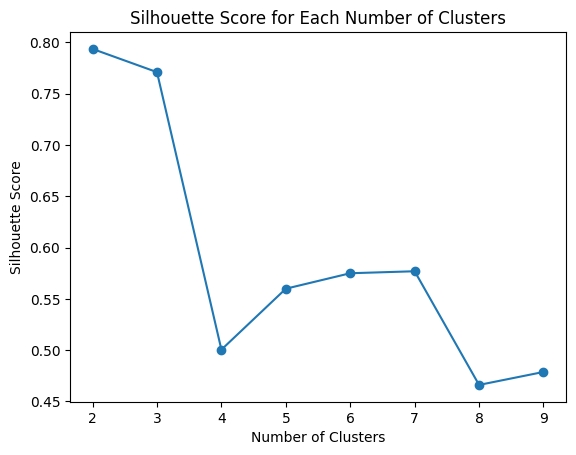

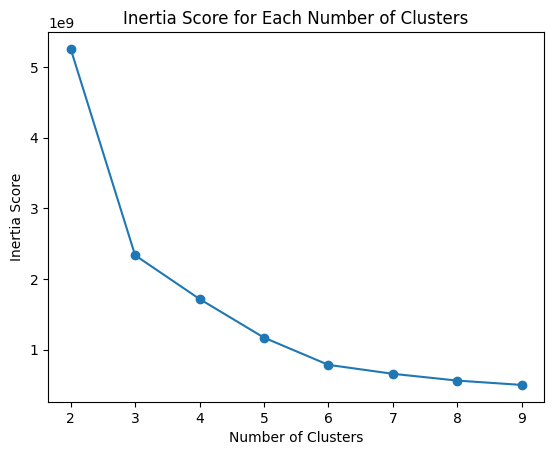

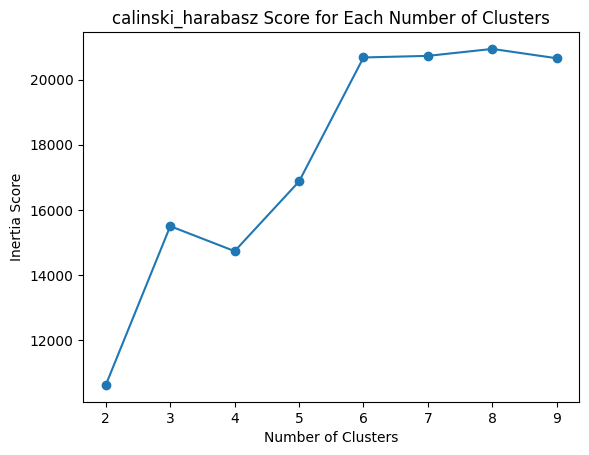

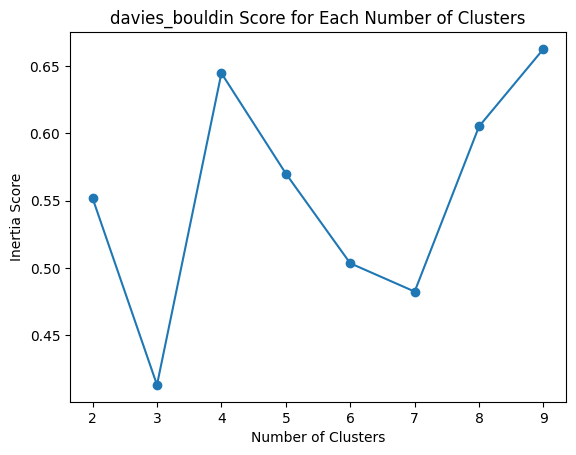

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# inspect the plots and choose the number of clusters that gives the highest average silhouette score. The optimal number of clusters is typically associated with a peak in the silhouette score plot.

# Function to create a silhouette plot
def plot_silhouette(X, clusters_range):
    silhouette_scores = []
    inertia_scores =[]
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        inertia_scores.append(kmeans.inertia_)
        calinski_harabasz_scores.append(calinski_harabasz_score(X, kmeans.labels_))
        davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            # plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        # plt.title(f"Silhouette Plot for {n_clusters} Clusters")
        # plt.xlabel("Silhouette Coefficient Values")
        # plt.ylabel("Cluster label")

        # plt.show()

    # Plot Silhouette Scores for different cluster numbers
    plt.plot(clusters_range, silhouette_scores, marker='o')
    plt.title("Silhouette Score for Each Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

    # Plot Inertia_ Scores for different cluster numbers
    plt.plot(clusters_range, inertia_scores, marker='o')
    plt.title("Inertia Score for Each Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia Score")
    plt.show()

    # Plot calinski_harabasz_score Scores for different cluster numbers
    plt.plot(clusters_range, calinski_harabasz_scores, marker='o')
    plt.title("calinski_harabasz Score for Each Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia Score")
    plt.show()

    # Plot davies_bouldin_score Scores for different cluster numbers
    plt.plot(clusters_range, davies_bouldin_scores, marker='o')
    plt.title("davies_bouldin Score for Each Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia Score")
    plt.show()



# Convert DataFrame to array for clustering
X = new_data1

# Define the range of clusters to try
clusters_range = range(2, 10)  # You can adjust this range based on your requirements

# Plot Silhouette plot for different numbers of clusters
plot_silhouette(X, clusters_range)
